In [1]:
# Figure 8 from DA6 by American Wood Council, 2007
# Revision History
# 0.0 19-Jul-2019 E.Durham created initial notebook

In [2]:
# Given:
#    span of beam, L in meters
#    magnitude of load, P in kN
#    distance from left end of beam to point of load, a in meters
#    distance from left end of beam to point of interest, x in meters
#    EI of member, use 1 if unknown; in kN*m**2
# Derive:
#    distance from right end of beam to point of load, b
#    reactions at ends of beams, R_1 and R_2
#    shear at points of interest
#    bending at points of interest
#    deflection at points of interest
#    plot graphs of shear, moment and deflection

In [3]:
import numpy as np

# Pint Unit Library
from pint import UnitRegistry
unit = UnitRegistry()
Q_ = unit.Quantity
unit.default_format = '~' # ~ for unit abreviations, P for prettyprint, or both
# Define symbols for common units
m = unit.meter; mm = unit.millimeter; inch = unit.inch;
kN = unit.kilonewton; kPa = unit.kilopascal; MPa = unit.megapascal; 
psi = unit.psi; ksi = unit.ksi

# matplotlib
# import matplotlib.pyplot as plt
# plt.ion()
# %matplotlib inline

# try bqplot
import bqplot as plt

SAMPLE_SIZE = 99 # number of discrete points within beam to compute

In [4]:
# Enter case values sans units at present
P = 1.6 * kN
a = 1.3 * m
L = 7.35 * m
EI = 1 * kN*m**2
# Derive distance b
b = L - a
# Calculate Reactions
R_1 = (P*b)/L # reaction at left support
R_2 = (P*a)/L # reaction at right support
# Derive max moment
M_max = (P*a*b)/L
M_max

1.712108843537415 <Unit('kilonewton * meter')>

In [5]:
def shear_x(x, P, a, L):
    """
    Determine shear for simple beam w/ concentrated load at any position x.
    
    where
    x = distance from left end of beam to point of interest
    P = concentrated load
    a = distance from left end of beam to point of load
    L = length of span of beam

    The function does not take or allign units. Units of x, a and L must be identical. 

    Returns value of shear at x in units_of_P
    
    """
    b = L - a # derive b given a and L
    if x >= 0 and x <= a:
        V_x = (P*b)/L
    elif x > a and x <= L:
        V_x = -(P*a)/L
    else:
        V_x = float('NaN')
        print("Error: x cannot be less than 0 or greater than L which is {} in this case".format(L))
    return V_x

In [6]:
def moment_x(x, P, a, L):
    """
    Determine moment for simple beam w/ concentrated load at any position x.

    where
    x = distance from left end of beam to point of interest
    P = concentrated load
    a = distance from left end of beam to point of load
    L = length of span of beam

    The function does not take or allign units. Units of x, a and L must be identical. 

    Returns value of moment at x in units_of_P * units_of_x
    """
    b = L - a # derive b given a and L
    if x >= 0 and x <= a:
        M_x = (P*x*b)/L
    elif x > a and x <= L:
        M_x = (P*(L-x)*a)/L
    else:
        M_x = float('NaN')
        print("Error: x cannot be less than 0 or greater than L which is {} in this case".format(L))
    return M_x

In [7]:
def deflection_x(x, P, a, L, EI=1):
    """
    Determine deflection for simple beam w/ concentrated load at any position x.

    where
    x = distance from left end of beam to point of interest
    P = concentrated load
    a = distance from left end of beam to point of load
    L = length of span of beam
    EI = modulus of elasticity of material in units_of_P / units_of_L**2 times
    second moment of area in units_of_L**4. Thus, EI is in units_of_P * units_of_L**2.
    Default value for EI is 1 in which case values returned are overstated by actual value
    of EI. That is, to determine deflection for a given EI, divide deflection here by
    actual value of EI.

    The function does not take or allign units. Units of x, a and L must be identical. 

    Returns value of deflection at x in units_of_L
    """
    b = L - a # derive b given a and L
    if x == a:
        deflection_x = -(P*a**2*b**2)/(3*EI*L)
    elif x >= 0 and x < a:
        deflection_x = -((P*b*x)/(6*EI*L))*(L**2-b**2-x**2)
    elif x > a and x <= L:
        deflection_x = -((P*a*(L-x))/(6*EI*L))*(2*L*x-x**2-a**2)
    else:
        deflection_x = float('NaN')
        print("Error: x cannot be less than 0 or greater than L which is {} in this case".format(L))
    return deflection_x

In [8]:
# create beam array and load with position, shear, moment and deflection values
beam = np.zeros((4, SAMPLE_SIZE))
beam[0, : ] = np.linspace(0, L.magnitude, SAMPLE_SIZE) # position
for i in range(SAMPLE_SIZE):
    beam[1, i] = shear_x(beam[0, i]*L.units, P, a, L).magnitude # stuff shear values
    beam[2, i] = moment_x(beam[0, i]*L.units, P, a, L).magnitude # stuff moment values
    beam[3, i] = deflection_x(beam[0, i]*L.units, P, a, L, EI).magnitude # stuff deflection values
# beam[0:]

In [11]:
# does not work in JupyterLab. It says "Loading widget..." forever
# try bqplot pyplot
from bqplot import pyplot as plt

plt.figure(1, title='Shear Diagram')
x = beam[0, : ]
y = beam[1, : ]
plt.plot(x, y)
plt.show()

In [9]:
# does not work in JupyterLab. It says "Loading widget..." forever
# plot shear diagram with bqplot
from IPython.display import display
from bqplot import (
    OrdinalScale, LinearScale, Bars, Lines, Axis, Figure
)
size = L
x_scale = LinearScale()
y_scale = LinearScale()

x_data = beam[0, : ]
line = Lines(x=x_data, y=beam[1, : ], scales={'x': x_scale, 'y' : y_scale},
            stroke_width=3, colors=['red'], display_legend=True, 
             labels=['Shear'])

axis_x = Axis(scale=x_scale, grid_lines='solid', label='X [m]')
axis_y = Axis(scale=y_scale, grid_lines='solid', label='V [kN]')

Figure(marks=[line], axes=[axis_x, axis_y], title='Beam Diagram 1',
      legend_location='bottom-right')

Figure(axes=[Axis(label='X [m]', scale=LinearScale()), Axis(label='V [kN]', scale=LinearScale())], fig_margin=…

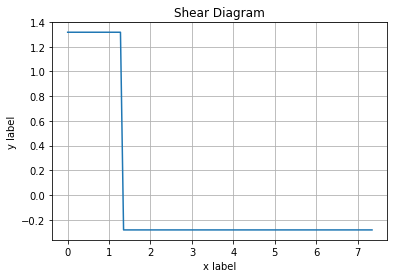

In [13]:
# plot shear diagram with matplotlib
import matplotlib.pyplot as plt
plt.ion()
# %matplotlib inline
ax = plt.plot(beam[0, : ], beam[1, : ])
plt.grid(b=True, which='both', axis='both')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Shear Diagram')
# plt.legend()
# cursor = Cursor(ax, useblit=True, color='red', linewidth=2)
plt.show()

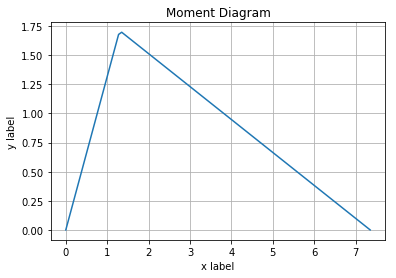

In [14]:
# from matplotlib.widgets import Cursor
bx = plt.plot(beam[0, : ], beam[2, : ])
plt.grid(b=True, which='both', axis='both')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Moment Diagram')
# plt.legend()
# cursor = Cursor(ax, useblit=True, color='red', linewidth=2)
plt.show()

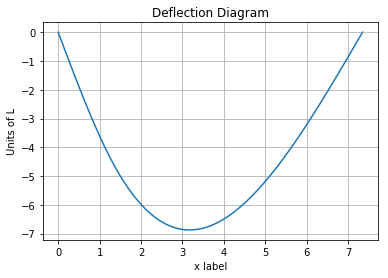

In [15]:
# plot deflection diagram
cx = plt.plot(beam[0, : ], beam[3, : ])
plt.grid(b=True, which='both', axis='both')
plt.xlabel('x label')
plt.ylabel('Units of L')
plt.title('Deflection Diagram')
# plt.legend()
plt.show()